<h1>Activity 2 - UK ROAD ACCIDENT DATA ANALYTICS PROJECT</h1>
<hr>
<h3>Analyst : Andrei Miguel P. Moralina</h3>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import folium
from folium.plugins import HeatMap
warnings.filterwarnings("ignore")

<h3>Converting Dataset(s) into DataFrame</h3>
<h2>Requirements</h2>
<ul>
    <li>Name of the DataFrame</li>
    <li>File Path</li>
</ul>

In [2]:
accident = pd.read_csv('datasets\\uk_road_accident.csv')

<h1>Clearing any Inconsistencies with the Data Set</h1>

In [3]:
accident['Accident Date'] = accident['Accident Date'].str.strip() #to remove any white spaces
accident['Accident Date'] = accident['Accident Date'].astype('str') #to convert into string
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-') #to replace "/" to "-" in date format

In [4]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst=True, errors='coerce')
accident.info()
accident.dropna(subset=['Accident Date'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660654 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660653 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  659953 non-null  object        
 10  Road_Type                656159 non-null  object        
 11  Urban_or_Rural_Area      660664 non-null  object        
 12  Weather_Conditio

In [5]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>Descriptive Analytics</h2>

In [6]:
accident.describe()

,Accident Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660679,660654.000000,660653.000000,660679.000000,660679.000000
mean,2020-11-30 08:30:32.761749760,52.553866,-1.431210,1.357040,1.831255
min,2019-01-01 00:00:00,49.914430,-7.516225,1.000000,1.000000
25%,2019-11-27 00:00:00,51.490690,-2.332291,1.000000,1.000000
50%,2020-11-13 00:00:00,52.315641,-1.411667,1.000000,2.000000
75%,2021-11-17 00:00:00,53.453452,-0.232869,1.000000,2.000000
max,2022-12-31 00:00:00,60.757544,1.762010,68.000000,32.000000
std,NaN,1.406922,1.383330,0.824847,0.715269


In [7]:
accident.describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,660679,2020-11-30 08:30:32.761749760,2019-01-01 00:00:00,2019-11-27 00:00:00,2020-11-13 00:00:00,2021-11-17 00:00:00,2022-12-31 00:00:00,NaN
Latitude,660654.0,52.553866,49.91443,51.49069,52.315641,53.453452,60.757544,1.406922
Longitude,660653.0,-1.43121,-7.516225,-2.332291,-1.411667,-0.232869,1.76201,1.38333
Number_of_Casualties,660679.0,1.35704,1.0,1.0,1.0,1.0,68.0,0.824847
Number_of_Vehicles,660679.0,1.831255,1.0,1.0,2.0,2.0,32.0,0.715269


<h2>Checking Null Values</h2>

In [8]:
accident.isnull()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660675,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660676,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660677,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h2>Filtering a column</h2>

In [10]:
accident['Index'].value_counts()

Index
2.01E+12         239478
2.01E+86              4
2.01E+197             4
2.01E+98              4
2.01E+175             4
                  ...  
201091NM01760         1
201091NM01881         1
201091NM01935         1
201091NM01964         1
201091NM02142         1
Name: count, Length: 421020, dtype: int64

In [11]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [12]:
accident['Accident Date'].value_counts()

Accident Date
2019-11-30    704
2019-01-31    697
2019-07-13    692
2021-11-13    692
2019-08-14    688
             ... 
2022-12-30    171
2019-12-25    157
2022-12-25    145
2022-01-10    123
2020-12-25    118
Name: count, Length: 1461, dtype: int64

In [13]:
accident['Latitude'].value_counts()

Latitude
52.458798    50
52.949719    45
53.083165    33
52.967634    31
52.938860    29
             ..
56.880265     1
56.865367     1
57.528413     1
57.194499     1
51.493490     1
Name: count, Length: 511618, dtype: int64

In [14]:
accident['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

In [15]:
accident['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

In [16]:
accident['Longitude'].value_counts()

Longitude
-0.977611    45
-1.871043    36
-0.816789    33
-1.190861    31
-1.216694    29
             ..
-4.169644     1
-3.798648     1
-3.630574     1
-3.836563     1
-3.924477     1
Name: count, Length: 529766, dtype: int64

In [17]:
accident['Number_of_Casualties'].value_counts()

Number_of_Casualties
1     504041
2     107971
3      30776
4      11156
5       4123
6       1525
7        539
8        214
9        112
10        58
11        36
13        24
12        21
14        13
15        11
17         8
19         7
16         7
18         6
22         5
21         4
29         3
40         2
28         2
24         2
27         2
42         2
25         1
32         1
68         1
45         1
62         1
47         1
48         1
26         1
43         1
Name: count, dtype: int64

In [18]:
accident['Number_of_Vehicles'].value_counts()

Number_of_Vehicles
2     391995
1     200787
3      52806
4      11300
5       2464
6        758
7        296
8        147
9         57
10        27
11        12
14         9
12         7
13         6
16         4
28         1
15         1
32         1
19         1
Name: count, dtype: int64

In [19]:
accident['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

In [20]:
accident['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

In [21]:
accident['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421663
Rural          238990
Unallocated        11
Name: count, dtype: int64

In [22]:
accident['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

In [23]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h2>FILLING UP NULL VALUES</h2>

In [24]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [25]:
accident['Latitude'].mean()

np.float64(52.553865761110956)

In [26]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

In [27]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Extracting date information using pandas date time</h1>
<hr>

In [28]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek']= accident['Accident Date'].dt.dayofweek #Monday=0, Sunday=6

In [29]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h2>Changing the Data type</h2>

In [30]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

In [31]:
accident['Index'] = accident['Index'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Accident Date'] = accident['Accident Date'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Number_of_Casualties'] = accident['Number_of_Casualties'].astype('category')
accident['Number_of_Vehicles'] = accident['Number_of_Vehicles'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [32]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  category
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  category
 8   Number_of_Vehicles       660679 non-null  category
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

<h2>Exploratory Data Analytics</h2>
<hr>

<h3>Question 1</h3>
<h4>1. How many accidents happened at night vs daytime?</p>

In [33]:
light_conditions_df = accident['Light_Conditions'].value_counts()
light_conditions_df

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h4>Insight No.1</h4>
<p>In this code shows how many accident happened at night and daytime</p>

<h3>Question 2</h3>
<h4>2. How many accidents happened in fine weather vs bad weather?</p>

In [34]:
weather_conditions_df = accident['Weather_Conditions'].value_counts()
weather_conditions_df

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h4>Insight No.2</h4>
<p>In this code shows how many accidents happened in fine weather and bad weather</p>

<h3>Question 3</h3>
<h4>3. How many accidents occurred in urban vs rural areas?</p>

In [35]:
urban_or_rural_df = accident['Urban_or_Rural_Area'].value_counts()
urban_or_rural_df

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h4>Insight No.3</h4>
<p>This shows how many accident in rural and urban areas</p>

<h3>Question 4</h3>
<h4>4. Which road type has the most accidents?</p>

In [36]:
accident['Road_Type'].value_counts()

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h4>Insight No.4</h4>
<p>The road type that has the most accidents is Single carriageway</p>

<h3>Question 5</h3>
<h4>5. How many accidents happened in each district area?</p>

In [37]:
accident['District Area'].value_counts().head(10)

District Area
Birmingham          13491
Leeds                8898
Manchester           6720
Bradford             6212
Sheffield            5710
Westminster          5706
Liverpool            5587
Glasgow City         4942
Bristol, City of     4819
Kirklees             4690
Name: count, dtype: int64

<h4>Insight No.5</h4>
<p>This shows the accidents happened in each district area</p>

<h3>Question 6</h3>
<h4>6. What is the total number of casualties?</p>

In [38]:
accident['Number_of_Casualties'] = pd.to_numeric(accident['Number_of_Casualties'], errors='coerce')
accident['Number_of_Casualties'].sum()

np.int64(896568)

<h4>Insight No.6</h4>
<p>Total lives affected in the dataset</p>

<h3>Question 7</h3>
<h4>7. What is the average number of casualties per accident?</p>

In [39]:
accident['Number_of_Casualties'].mean()

np.float64(1.357040257068864)

<h4>Insight No.7</h4>
<p>Shows how severe accidents are on average</p>

<h3>Question 8</h3>
<h4>8. How many accidents involved only 1 vehicle vs multiple vehicles?</p>

In [40]:
accident['Number_of_Vehicles'].value_counts()

Number_of_Vehicles
2     391995
1     200787
3      52806
4      11300
5       2464
6        758
7        296
8        147
9         57
10        27
11        12
14         9
12         7
13         6
16         4
15         1
19         1
28         1
32         1
Name: count, dtype: int64

<h4>Insight No.8</h4>
<p>Distinguishes between single-vehicle crashes (often driver error) vs multi-vehicle collisions</p>

<h3>Question 9</h3>
<h4>9. What is the distribution of accident severity?</p>

In [41]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h4>Insight No.9</h4>
<p>Most accidents are usually slight, fewer are serious or fatal</p>

<h3>Question 10</h3>
<h4>10. Which road surface conditions are most common in accidents?</p>

In [42]:
accident['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<h4>Insight No.10</h4>
<p>Shows whether dry, wet, or icy surfaces are linked to accidents. Dry is the most common accidents</p>

<h3>Question 11</h3>
<h4>11. Which year recorded the most accidents?</p>

In [43]:
accident['Accident Date'].dt.year.value_counts().idxmax()

np.int32(2019)

<h4>Insight No.11</h4>
<p>In 2019 recorded the most accidents in this datasets.</p>

<h3>Question 12</h3>
<h4>12. Which day of the week has the highest number of accidents?</p>

In [44]:
accident['Accident Date'].dt.day_name().value_counts().head(1)

Accident Date
Saturday    107178
Name: count, dtype: int64

<h4>Insight No.12</h4>
<p>The day of the week that has the highest number of accidents is Tuesday</p>

<h3>Question 13</h3>
<h4>13. Which vehicle type is most often involved in fatal accidents?</p>

In [45]:
accident[accident['Accident_Severity']=='Fatal']['Vehicle_Type'].value_counts().head(1)

Vehicle_Type
Car    6577
Name: count, dtype: int64

<h4>Insight No.13</h4>
<p>The vehicle type that most often involved in fatal accidents is Car</p>

<h3>Question 14</h3>
<h4>14. Which district area has the highest average casualties per accident?</p>

In [46]:
accident.groupby('District Area')['Number_of_Casualties'].mean().sort_values(ascending=False).head(1)

District Area
Blaeu Gwent    1.693694
Name: Number_of_Casualties, dtype: float64

<h4>Insight No.14</h4>
<p>The district area that has the highest average casualties per accident is Blaeu Gwent</p>

<h3>Question 15</h3>
<h4>15. Which road surface condition has the highest percentage of fatal accidents?</p>

In [47]:
fatal_ratio = (
    accident[accident['Accident_Severity']=='Fatal']
    .groupby('Road_Surface_Conditions').size() 
    / accident.groupby('Road_Surface_Conditions').size()
) * 100
fatal_ratio.sort_values(ascending=False).head(1)

Road_Surface_Conditions
Flood over 3cm. deep    2.261554
dtype: float64

<h4>Insight No.15</h4>
<p>The road surface condition that has the highest percentage of fatal accidents is Flood over 3cm. deep 2.2</p>

<h3>Question 16</h3>
<h4>16. Accidents per year</p>

In [48]:
accident.groupby(accident['Accident Date'].dt.year).size()

Accident Date
2019    182115
2020    170591
2021    163554
2022    144419
dtype: int64

<h4>Insight No.16</h4>
<p>This show the accidents per year</p>

<h3>Question 17</h3>
<h4>17. Fatal accidents per year</p>

In [49]:
accident[accident['Accident_Severity']=='Fatal'].groupby(accident['Accident Date'].dt.year).size()

Accident Date
2019    2714
2020    2341
2021    2057
2022    1549
dtype: int64

<h4>Insight No.17</h4>
<p>This shows the Fatal accidents per year in 2019-2022</p>

<h3>Question 18</h3>
<h4>18. Average casualties per accident by road type</p>

In [50]:
accident.groupby('Road_Type')['Number_of_Casualties'].mean()

Road_Type
Dual carriageway      1.477279
One way street        1.192713
Roundabout            1.274891
Single carriageway    1.343788
Slip road             1.423661
Name: Number_of_Casualties, dtype: float64

<h4>Insight No.18</h4>
<p>This is the average casualties per accident by road type</p>

<h3>Question 19</h3>
<h4>19. Severity distribution by district area</p>

In [51]:
accident.groupby('District Area')['Accident_Severity'].value_counts().unstack().fillna(0).head(10)

Accident_Severity,Fatal,Serious,Slight
District Area,,,
Aberdeen City,12,239,1072
Aberdeenshire,66,463,1401
Adur,8,101,510
Allerdale,24,143,961
Alnwick,6,33,193
Amber Valley,19,173,1155
Angus,32,163,601
Argyll and Bute,27,184,625
Arun,15,253,1108


<h4>Insight No.19</h4>
<p>This is the Severity distribution by district area</p>

<h3>Question 20</h3>
<h4>20. Weather conditions vs severity</p>

In [52]:
accident.groupby('Weather_Conditions')['Accident_Severity'].value_counts().unstack().fillna(0).head(10)

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,175,1245,7134
Fine no high winds,7207,73285,454521
Fog or mist,82,483,2963
Other,165,1801,15184
Raining + high winds,145,1261,8209
Raining no high winds,848,9468,69380
Snowing + high winds,3,109,773
Snowing no high winds,36,565,5637


<h4>Insight No.20</h4>
<p>Compares how different weather affects severity levels</p>

<h3>Question 21</h3>
<h4>21. How many accidents occurred each year?</p>

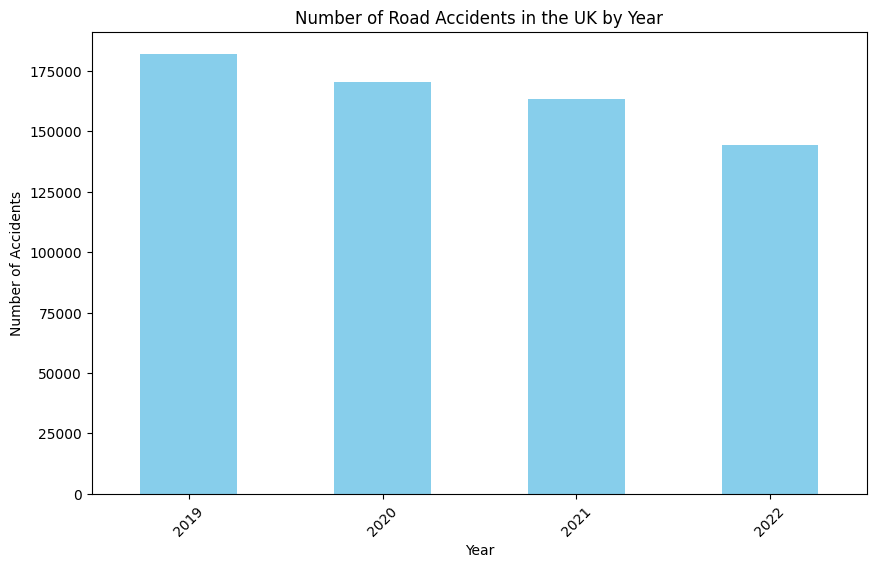

In [53]:
# Extract year from Date column
accident['Year'] = accident['Accident Date'].dt.year

# Group by Year and count accidents
accidents_per_year = accident.groupby('Year').size()

# Plot the result
plt.figure(figsize=(10, 6))
accidents_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Road Accidents in the UK by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<h4>Insight No.21</h4>
<p>This graph shows the trend of road accidents in the UK over the years. From the visualization, we can observe whether accidents have been increasing, decreasing, or stable over time.</p>

<h3>Question 22</h3>
<h4>22. What is the distribution of accidents across different weather conditions?</p>

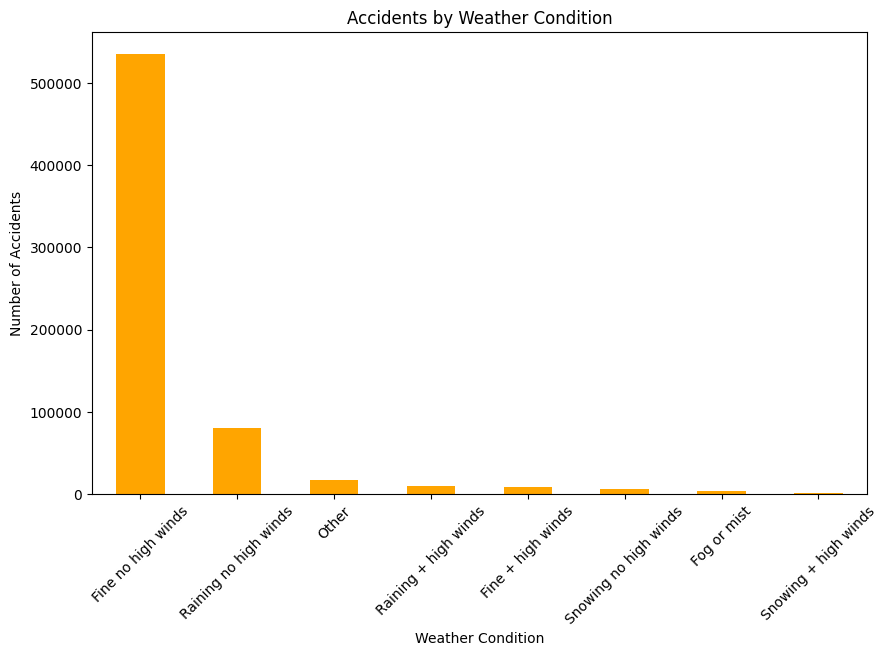

In [54]:
weather_accidents = accident['Weather_Conditions'].value_counts()

plt.figure(figsize=(10, 6))
weather_accidents.plot(kind='bar', color='orange')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<h4>Insight No.22</h4>
<p>This graph shows the distribution of accidents across different weather conditions</p>

<h3>Question 23</h3>
<h4>23. How do accidents vary by time of day?</p>

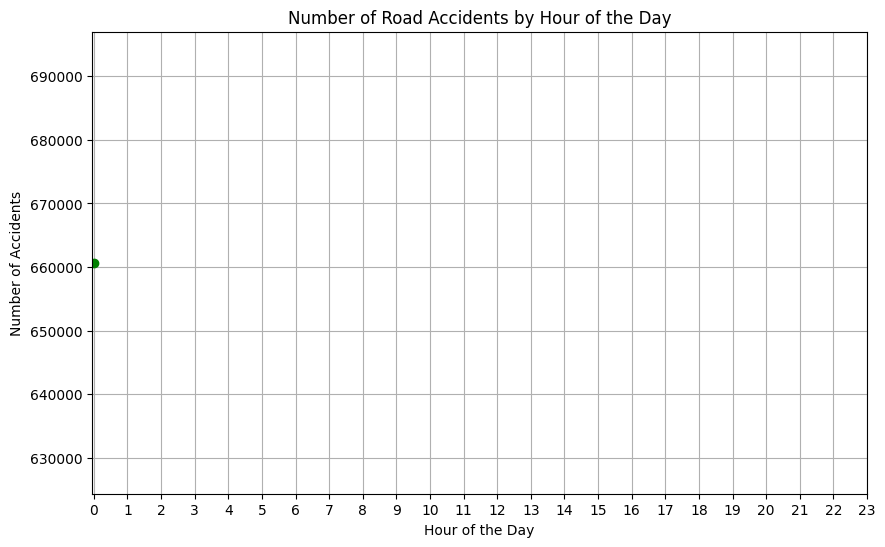

In [55]:
accident['Hour'] = accident['Accident Date'].dt.hour

accidents_by_hour = accident.groupby('Hour').size()

plt.figure(figsize=(10, 6))
accidents_by_hour.plot(kind='line', marker='o', color='green')
plt.title('Number of Road Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24, 1))
plt.grid(True)
plt.show()

<h4>Insight No.23</h4>
<p>This line chart shows how the number of accidents fluctuates throughout the day.</p>

<h3>Question 24</h3>
<h4>24. What is the distribution of accidents by road type?</p>

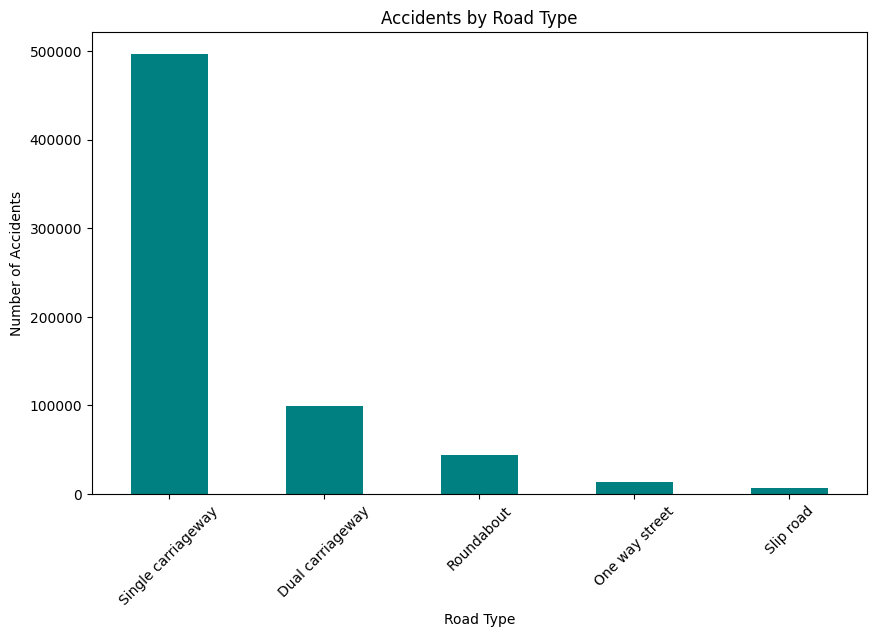

In [56]:
road_type_accidents = accident['Road_Type'].value_counts()

plt.figure(figsize=(10, 6))
road_type_accidents.plot(kind='bar', color='teal')
plt.title('Accidents by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<h4>Insight No.24</h4>
<p>This bar chart shows the distribution of accidents across different types of roads.</p>

<h3>Question 25</h3>
<h4>25. How do accidents vary by day of the week?</p>

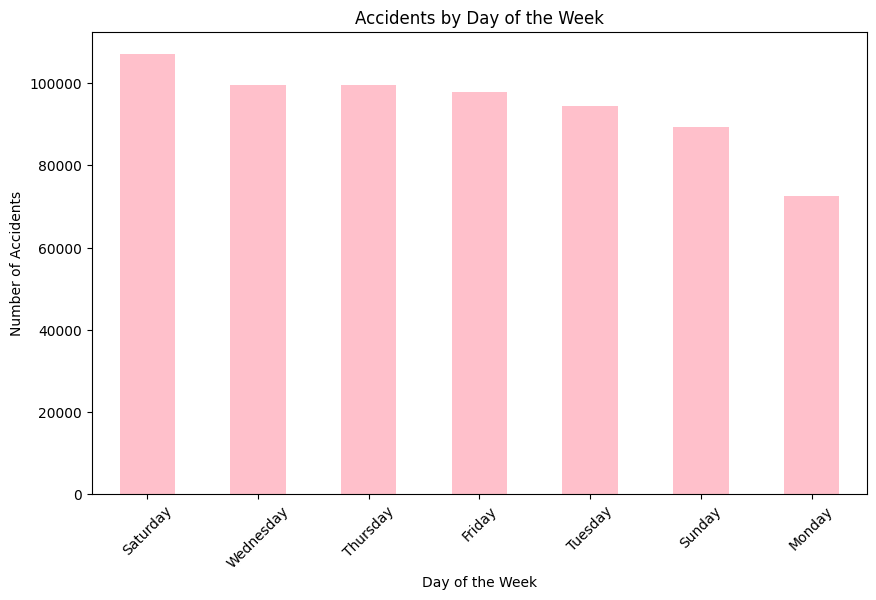

In [57]:
accident['Day_of_Week'] = accident['Accident Date'].dt.day_name()

accidents_by_day = accident['Day_of_Week'].value_counts()

plt.figure(figsize=(10, 6))
accidents_by_day.plot(kind='bar', color='pink')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<h4>Insight No.25</h4>
<p>This bar chart reveals how accident numbers vary across the days of the week.</p>

<h1>6 DATA VISUALIZATION OF DATAS IN DISTRICT AREAS</h1>
<HR></HR>

In [58]:
accident['District Area'].unique()

['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames', 'Hammersmith and Fulham', 'Hounslow', ..., 'County Durham', 'Shropshire', 'Central Bedfordshire', 'Cornwall', 'Wiltshire']
Length: 422
Categories (422, object): ['Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', ..., 'Wycombe', 'Wyre', 'Wyre Forest', 'York']

In [59]:
warwick_df = accident[accident['District Area'] == 'Warwick']
lincoln_df = accident[accident['District Area'] == 'Lincoln']
cornwall_df = accident[accident['District Area'] == 'Cornwall']
greenwich_df = accident[accident['District Area'] == 'Greenwich']
fife_df = accident[accident['District Area'] == 'Fife']
richmondshire_df = accident[accident['District Area'] == 'Richmondshire']

<h1>Visualization 1: Monthly Accidents in 2020 by District</h1>

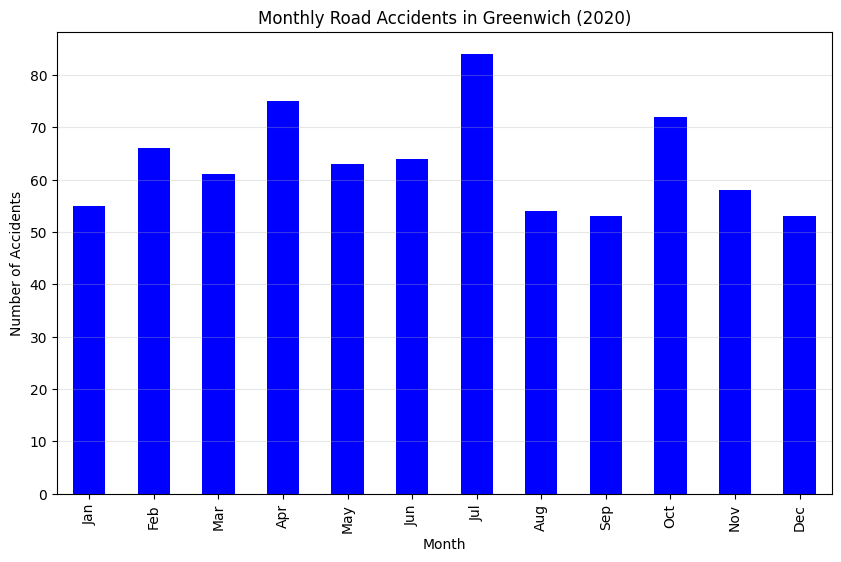

In [60]:
greenwich_data = accident[(accident['Year'] == 2020) & (accident['District Area'] == 'Greenwich')]

monthly_greenwich = greenwich_data.groupby('Month').size()

monthly_greenwich.plot(kind='bar', figsize=(10, 6), color='blue', title='Monthly Road Accidents in Greenwich (2020)')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', alpha=0.3)
plt.show()

<h2>Insight Visualization 1:</h2>
<p>The bar chart displays the number of road accidents in Greenwich for each month of 2020. The chart shows that April and July had the highest number of accidents, while September and December had the fewest. This could suggest that accidents are more frequent in months with higher traffic or adverse weather conditions, and fewer accidents occur during the winter months when road usage might be lower.</p>

<h1>Visualization 2: Top 5 Districts with Most Accidents</h1>

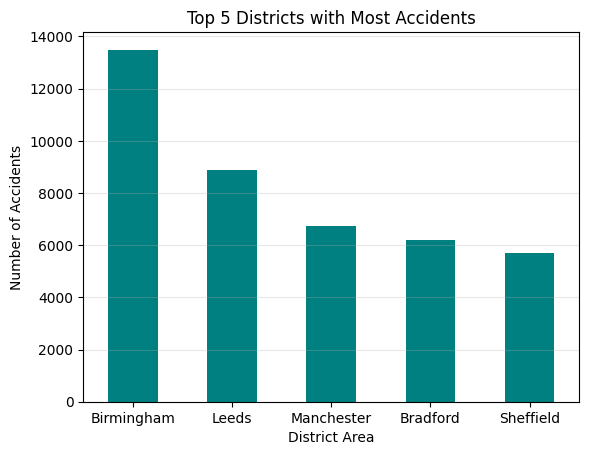

<h2>Insight Visualization 2:</h2>
<p>The bar chart shows that Birmingham has the highest number of road accidents, followed by Leeds, Manchester, Bradford, and Sheffield. This suggests that these cities may have higher traffic volumes, larger populations, or more complex urban infrastructures that contribute to the increased number of accidents. Focusing on these high-accident districts could help local authorities implement targeted road safety initiatives to reduce accident rates and improve overall traffic management.</p>

<h1>Visualization 3: Monthly Accident Trend for All Districts (2020)</h1>

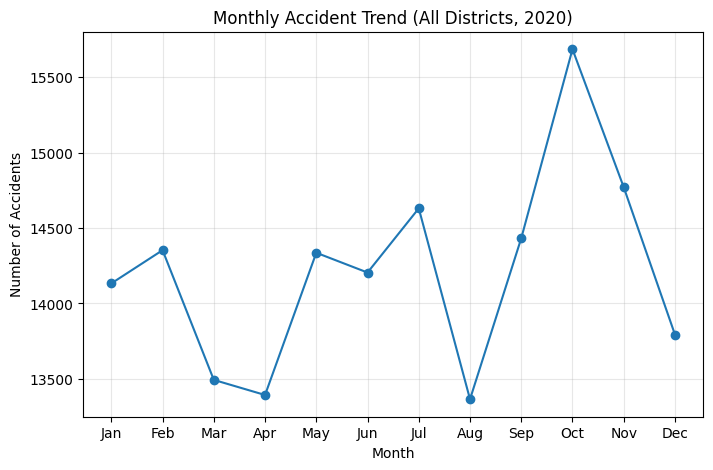

In [62]:
accident_2020 = accident[accident['Year'] == 2020]

monthly_total_2020 = accident_2020.groupby('Month').size()

monthly_total_2020.plot(marker='o', figsize=(8,5), title='Monthly Accident Trend (All Districts, 2020)')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

<h2>Insight Visualization 3:</h2>
<p>The line chart displays the monthly accident trend across all districts in 2020. The data reveals that October had the highest number of accidents, while April and August saw the lowest. The trend suggests that accidents were more frequent in the latter part of the year, especially in October, which could be linked to factors like weather conditions, seasonal traffic patterns, or increased road usage. The lower accident counts in April and August may be due to reduced traffic or better weather conditions during these months, leading to safer driving conditions.</p>

<h1>Visualization 4: Accidents by Day of the Week</h1>

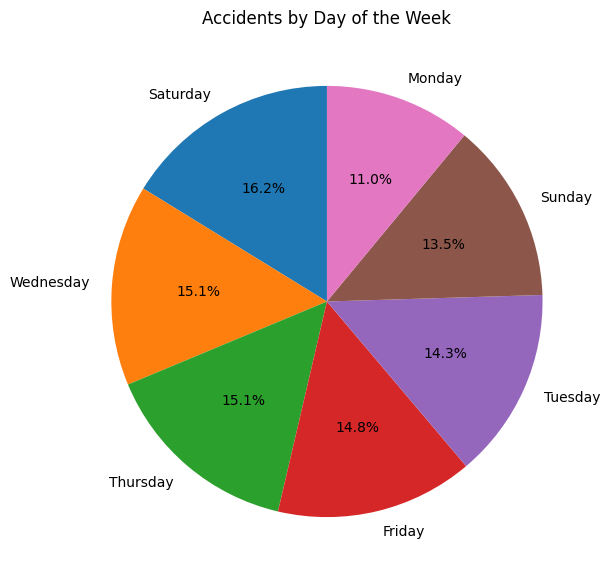

In [63]:
day_counts = accident['Day_of_Week'].value_counts()

day_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7), startangle=90, title='Accidents by Day of the Week')
plt.ylabel('')
plt.show()

<h2>Insight Visualization 4:</h2>
<p>The pie chart shows the distribution of road accidents across different days of the week. From the chart, we can observe that Saturday, Wednesday and Thursday have the highest accident rates, indicating that accidents are more likely to occur at the start and end of the workweek. This could be due to increased traffic as people commute to and from work, along with potential higher stress levels or rushed driving during these days. The chart suggests that weekends (Monday and Sunday) might see fewer accidents, possibly due to different driving patterns, such as more leisure driving or fewer commuters on the roads.</p>

<h1>Visualization 5: Monthly Night-Time Accidents in Warwick (2019–2022)</h1>

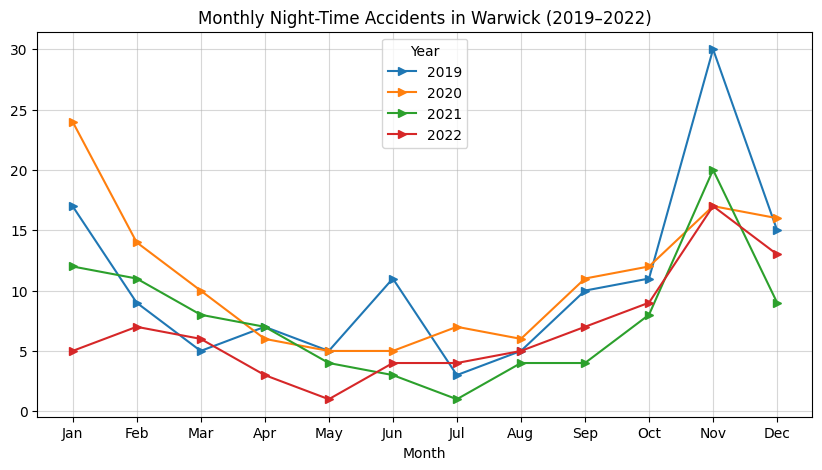

In [64]:
import matplotlib.pyplot as plt

night_conditions = ['Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting']
warwick_night = accident[
    (accident['District Area'] == 'Warwick') &
    (accident['Light_Conditions'].isin(night_conditions))
]

monthly_warwick_night = warwick_night.groupby(['Year', 'Month']).size()

monthly_warwick_night = monthly_warwick_night.unstack(level=0)

monthly_warwick_night.plot(
    marker='>', 
    figsize=(10, 5),
    title='Monthly Night-Time Accidents in Warwick (2019–2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.5)
plt.show()

<h2>Insight Visualization 5:</h2>
<p>The line chart displays the monthly trend of night-time accidents in Warwick from 2019 to 2022. The data reveals fluctuations in accident frequency across different years, with some months consistently showing higher accident rates, particularly in the winter months (e.g., November, December). This could be due to factors like shorter daylight hours and poorer visibility during the evenings and nights.</p>

<h1>Visualization 6: Accident Severity Distribution in Cornwall (2019–2022)</h1>

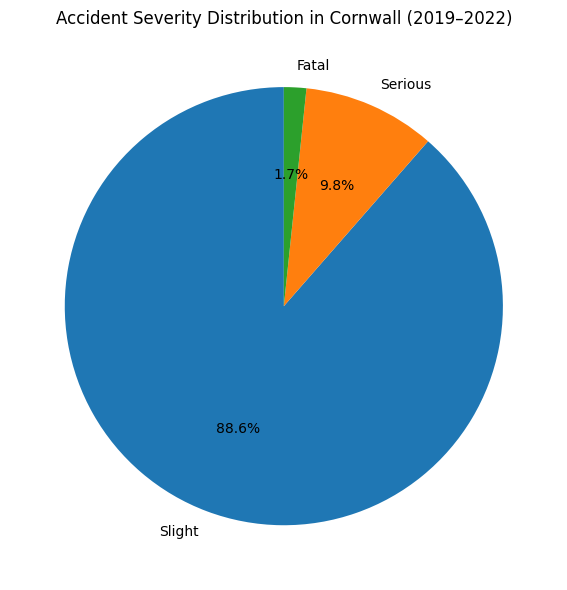

In [65]:
cornwall_df = accident[accident['District Area'] == 'Cornwall']

severity_counts = cornwall_df['Accident_Severity'].value_counts()

severity_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6, 6),
    startangle=90,
    title='Accident Severity Distribution in Cornwall (2019–2022)',
    legend=False
)
plt.ylabel('')
plt.tight_layout()
plt.show()

<h2>Insight Visualization 6:</h2>
<p>The pie chart shows the distribution of accident severity in Cornwall from 2019 to 2022. From the chart, we can observe the proportion of slight, serious, and fatal accidents in the area. The majority of accidents appear to be slight, with a smaller percentage classified as serious and an even smaller portion being fatal.</p>

<h1 style="text-align: center; font-family: Arial; color: white;">
        Heat Map of Road Accidents in Cornwall by Severity
    </h1>
<hr>

In [66]:
import folium
from folium.plugins import HeatMap

cornwall_df = accident[accident['District Area'] == 'Cornwall']

cornwall_df = cornwall_df.dropna(subset=['Latitude', 'Longitude'])

cornwall_locations = list(zip(cornwall_df['Latitude'], cornwall_df['Longitude']))

cornwall_map = folium.Map(
    location=[cornwall_df['Latitude'].mean(), cornwall_df['Longitude'].mean()],
    zoom_start=10
)

HeatMap(
    cornwall_locations,
    radius=12,
    blur=10,
    max_zoom=13,
    gradient={0.3: 'green', 0.5: 'orange', 0.8: 'red'}
).add_to(cornwall_map)

cornwall_map.save('Cornwall_accidents_heatmap.html')

cornwall_map

<h2>Insight Heat Map 6:</h2>
<p>The heatmap shows the distribution of road accidents across Cornwall. Areas with higher accident density are marked in red, indicating hot spots where accidents are more frequent. These high-risk areas should be prioritized for safety improvements, such as better road design, lighting, or traffic control measures. Conversely, regions with fewer accidents, shown in green, may reflect safer or less trafficked zones.</p>